In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-paration

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30115,Resort Hotel,0,6,2018,January,47,16,0,1,1,...,0,No Deposit,240.0,NaN,0,Personal,43.0,0,2,Check-Out
2940,Resort Hotel,0,171,2017,January,45,7,2,6,2,...,0,No Deposit,240.0,NaN,0,Personal,32.4,0,0,Check-Out
21714,Resort Hotel,0,1,2018,May,10,1,2,6,1,...,0,No Deposit,NaN,NaN,0,Personal,39.5,0,0,Check-Out
10229,Resort Hotel,1,7,2019,April,8,22,0,1,2,...,2,No Deposit,250.0,NaN,0,Personal,87.0,0,0,Canceled
3768,Resort Hotel,1,113,2018,March,1,2,0,1,2,...,0,Non Refund,305.0,NaN,0,Personal,72.0,0,0,Canceled


import data dan menampilkan sampel data untuk di preview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

menampilkan info dari dataframe mulai dari nama kolom, jumlah baris, dan tipe data

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

melihat data yang null(kosong)

In [ ]:
df[['children','city','agent','company','meal']].sample(5)

,children,city,agent,company,meal
102368,0.0,Kota Denpasar,28.0,NaN,Breakfast
11425,0.0,Kota Denpasar,NaN,NaN,Undefined
75277,0.0,Kota Denpasar,1.0,NaN,Breakfast
69166,0.0,Kota Denpasar,NaN,43.0,Breakfast
37843,0.0,Kota Malang,240.0,NaN,Breakfast


preview data yang null(kosong)

In [ ]:
df.groupby('meal').agg({'hotel':'count'})

,hotel
meal,
Breakfast,92310
Dinner,14463
Full Board,798
No Meal,10650
Undefined,1169


In [ ]:
df.groupby('market_segment').agg({'hotel':'count'})

,hotel
market_segment,
Aviation,237
Complementary,743
Corporate,5295
Direct,12606
Groups,19811
Offline TA/TO,24219
Online TA,56477
Undefined,2


In [ ]:
df.groupby('distribution_channel').agg({'hotel':'count'})

,hotel
distribution_channel,
Corporate,6677
Direct,14645
GDS,193
TA/TO,97870
Undefined,5


terlihat beberapa kolom ada kategori 'undifined', selanjutnya akan di ubah ke Nan

In [ ]:
df=df.replace('Undefined', np.nan)

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                1169
city                                 488
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['meal'].fillna(df['meal'].mode()[0], inplace=True)

In [ ]:
df=df.dropna(subset=['children','market_segment','distribution_channel'])

untuk kolom "city" dan "meal" dilakukan modus untuk mengisi yang kosong, dan kolom "childern","market_segment","distribution_channel" akan di hapus yang memiliki value kosong

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               0
babies                                 0
meal                                   0
city                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16337
company                           112588
days_in_waiting_list                   0
customer_type   

In [ ]:
df=df.drop(['company'], axis = 1)

kolom "company" dihappus karena terlalu banyak yang missing, tidak mungkin di handle lagi(mode,mean,ect)

# Monthly Hotel Booking Analysis bases on Hotel Type

In [ ]:
df_group_1=df.groupby(['arrival_date_month','arrival_date_year','hotel']).agg({'is_canceled':'count'})
df_group_1_reset=df_group_1.reset_index()
df_group_1_reset=df_group_1_reset.rename(columns={'arrival_date_month':'Month',
                                                  'arrival_date_year':'Year',
                                                  'hotel':'Type_hotel',
                                                  'is_canceled':'count'})
df_group_1_reset

,Month,Year,Type_hotel,count
0,April,2018,City Hotel,2371
1,April,2018,Resort Hotel,1520
2,April,2019,City Hotel,2594
3,April,2019,Resort Hotel,1583
4,August,2018,City Hotel,3923
5,August,2018,Resort Hotel,1369
6,August,2019,City Hotel,3971
7,August,2019,Resort Hotel,1676
8,December,2017,City Hotel,3386
9,December,2017,Resort Hotel,1571


In [ ]:
datates=df_group_1_reset
datates['Month']=np.where(datates['Month']=='January','Jan',
                       np.where(datates['Month']=='February','Feb',
                                np.where(datates['Month']=='March','Mar',
                                         np.where(datates['Month']=='April','Apr',
                                                  np.where(datates['Month']=='May','May',
                                                           np.where(datates['Month']=='June','Jun',
                                                                    np.where(datates['Month']=='July','Jul',
                                                                             np.where(datates['Month']=='August','Aug',
                                                                                      np.where(datates['Month']=='September','Sep',
                                                                                               np.where(datates['Month']=='October','Oct',
                                                                                                        np.where(datates['Month']=='November','Nov',
                                                                                                                 np.where(datates['Month']=='December','Dec','nan')
                                                                                                                 )
                                                                                                        )
                                                                                               )
                                                                                      )
                                                                             )
                                                                    )
                                                           )
                                                  )
                                         )
                                )
                       )

In [ ]:
datates=df_group_1_reset

In [ ]:
df_group_1_reset['Months'] = pd.DatetimeIndex(pd.to_datetime(df_group_1_reset['Month'], format='%b')).month

In [ ]:
df_group_1_reset

,Month,Year,Type_hotel,count,Months
0,Apr,2018,City Hotel,2371,4
1,Apr,2018,Resort Hotel,1520,4
2,Apr,2019,City Hotel,2594,4
3,Apr,2019,Resort Hotel,1583,4
4,Aug,2018,City Hotel,3923,8
5,Aug,2018,Resort Hotel,1369,8
6,Aug,2019,City Hotel,3971,8
7,Aug,2019,Resort Hotel,1676,8
8,Dec,2017,City Hotel,3386,12
9,Dec,2017,Resort Hotel,1571,12


In [ ]:
pivot1=pd.pivot_table(df_group_1_reset,
                      index = ['Months','Month'],
                      columns = ['Year','Type_hotel'],
                      values = ['count'])
pivot1

count                                                  \
Year               2017                    2018                    2019   
Type_hotel   City Hotel Resort Hotel City Hotel Resort Hotel City Hotel   
Months Month                                                              
1      Jan       1235.0       1105.0     3122.0       1332.0        NaN   
2      Feb       1654.0       1266.0     2478.0       1382.0        NaN   
3      Mar          NaN          NaN     1364.0        884.0     2372.0   
4      Apr          NaN          NaN     2371.0       1520.0     2594.0   
5      May          NaN          NaN     3046.0       1778.0     3412.0   
6      Jun          NaN          NaN     3561.0       1867.0     3919.0   
7      Jul          NaN          NaN     3676.0       1802.0     4556.0   
8      Aug          NaN          NaN     3923.0       1369.0     3971.0   
9      Sep       1398.0       1377.0     3131.0       1441.0     3559.0   
10     Oct       2476.0       1409.0     3378.0       1685.0     3125.0   
11     Nov       3529.0       1585.0     3871.0       1523.0        NaN   
12     Dec       3386.0       1571.0     4219.0       1984.0        NaN   

                           
Year                       
Type_hotel   Resort Hotel  
Months Month               
1      Jan            NaN  
2      Feb            NaN  
3      Mar         1309.0  
4      Apr         1583.0  
5      May         1558.0  
6      Jun         1742.0  
7      Jul         1757.0  
8      Aug         1676.0  
9      Sep         1754.0  
10     Oct         1800.0  
11     Nov            NaN  
12     Dec            NaN

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_group_1_reset['count_norm'] = MinMaxScaler().fit_transform(df_group_1_reset['count'].values.reshape(len(df_group_1_reset),1))

In [ ]:
pivot2=pd.pivot_table(df_group_1_reset,
                      index = ['Months','Month'],
                      columns = ['Year','Type_hotel'],
                      values = ['count_norm'])
pivot2

count_norm                                                  \
Year               2017                    2018                    2019   
Type_hotel   City Hotel Resort Hotel City Hotel Resort Hotel City Hotel   
Months Month                                                              
1      Jan     0.095588     0.060185   0.609477     0.122004        NaN   
2      Feb     0.209695     0.104031   0.434096     0.135621        NaN   
3      Mar          NaN          NaN   0.130719     0.000000   0.405229   
4      Apr          NaN          NaN   0.404956     0.173203   0.465686   
5      May          NaN          NaN   0.588780     0.243464   0.688453   
6      Jun          NaN          NaN   0.729031     0.267702   0.826525   
7      Jul          NaN          NaN   0.760349     0.250000   1.000000   
8      Aug          NaN          NaN   0.827614     0.132081   0.840686   
9      Sep     0.139978     0.134259   0.611928     0.151688   0.728486   
10     Oct     0.433551     0.142974   0.679194     0.218137   0.610294   
11     Nov     0.720316     0.190904   0.813453     0.174020        NaN   
12     Dec     0.681373     0.187092   0.908224     0.299564        NaN   

                           
Year                       
Type_hotel   Resort Hotel  
Months Month               
1      Jan            NaN  
2      Feb            NaN  
3      Mar       0.115741  
4      Apr       0.190359  
5      May       0.183551  
6      Jun       0.233660  
7      Jul       0.237745  
8      Aug       0.215686  
9      Sep       0.236928  
10     Oct       0.249455  
11     Nov            NaN  
12     Dec            NaN

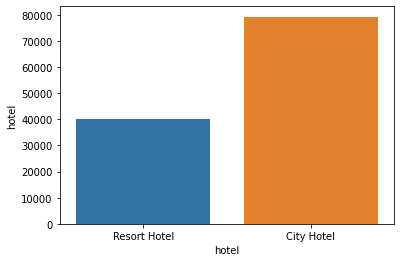

In [ ]:
d = df.groupby('hotel')['hotel'].count()
sns.barplot(x=d.index, y=d,order=['Resort Hotel','City Hotel'])

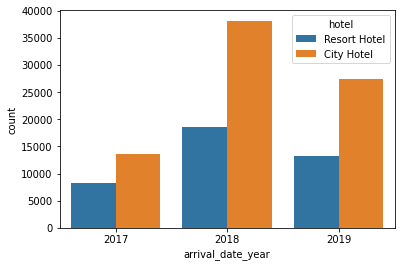

In [ ]:
sns.countplot(x='arrival_date_year', hue='hotel', data=df)

Text(0.5, 1.0, 'Bookings by months')

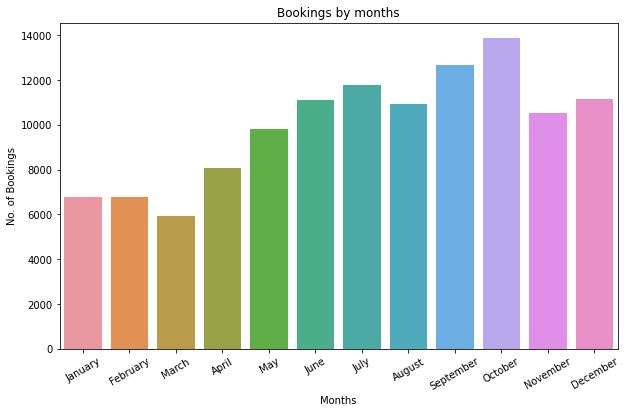

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

d = df.groupby("arrival_date_month")["arrival_date_month"].count()
plt.figure(figsize=(10,6))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by months")

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates


In [ ]:
df['days'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,days
112030,City Hotel,0,15,2019,July,20,17,0,2,2,...,0,No Deposit,9.0,0,Personal,190.00,0,1,Check-Out,2
61638,City Hotel,1,26,2018,February,52,21,1,4,2,...,0,No Deposit,83.0,0,Personal,102.72,0,0,Canceled,5
94584,City Hotel,0,13,2018,October,32,6,0,1,2,...,2,No Deposit,9.0,0,Personal,151.00,0,1,Check-Out,1
47578,City Hotel,1,81,2018,April,9,27,2,6,1,...,0,No Deposit,9.0,0,Personal,73.95,0,0,Canceled,8
15803,Resort Hotel,0,44,2017,September,31,31,1,2,2,...,1,No Deposit,241.0,0,Personal,118.99,0,0,Check-Out,3


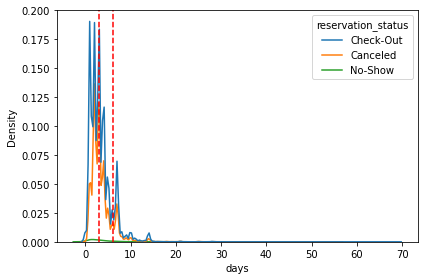

In [ ]:
sns.kdeplot(x='days',data=df,hue='reservation_status')
plt.axvline(x=3,color='red',ls='--')
plt.axvline(x=6,color='red',ls='--')
plt.tight_layout()

In [ ]:
df['cat_days'] = np.where(df['days']<3,'short',
                          np.where(df['days']<6,'medium','long'))

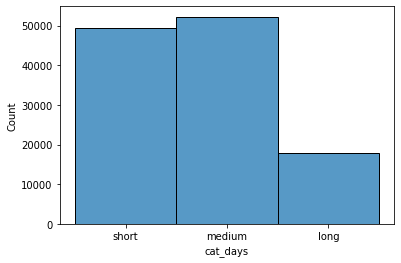

In [ ]:
sns.histplot(x='cat_days', data=df)


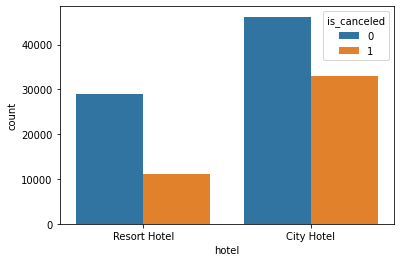

In [ ]:
sns.countplot(x='hotel', hue='is_canceled', data=df)

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

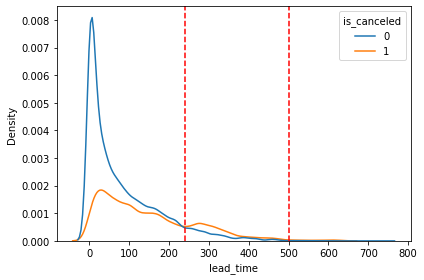

In [ ]:
sns.kdeplot(x='lead_time',data=df,hue='is_canceled')
plt.axvline(x=240,color='red',ls='--')
plt.axvline(x=500,color='red',ls='--')
plt.tight_layout()

In [ ]:
df['cat_lead_time'] = np.where(df['lead_time']<240,'short',
                              np.where(df['days']<500,'medium','long'))

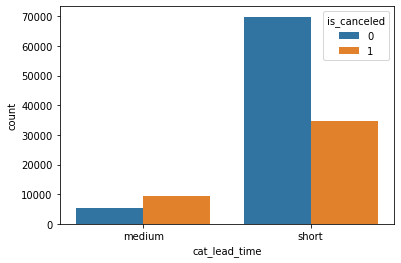

In [ ]:
sns.countplot(x='cat_lead_time', hue='is_canceled', data=df)